In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import math

In [4]:
data=pd.read_excel("data_set.xlsx")

In [5]:
data.shape

(72791, 8)

In [6]:
data.head()

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode
0,25502921,2018-08-16 10:23:36,0,175.000,0.0,0.0,0.0,0
1,25502921,2018-08-16 10:33:55,0,155.557,0.0,0.0,0.0,0
2,25502921,2018-08-16 10:43:55,0,153.615,0.0,0.0,0.0,0
3,25502921,2018-08-16 10:53:55,0,152.512,0.0,0.0,0.0,0
4,25502921,2018-08-16 11:03:55,0,151.393,0.0,0.0,0.0,0


In [7]:
data['Company Id'].value_counts()

25927159    31585
25750275    16306
25921010    11124
25921355    10111
25502921     3665
Name: Company Id, dtype: int64

In [8]:
datagrp=data.groupby(['Company Id'],as_index=False)

In [9]:
adata=datagrp.first()

In [10]:
adata.shape

(5, 8)

In [11]:
adata

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode
0,25502921,2018-08-16 10:23:36,0,175.0000,0.000,0.0,0.00000,0
1,25750275,2018-08-16 00:00:26,1,78.3680,0.962,48.7,33756.00000,0
2,25921010,2018-10-03 16:54:44,0,0.0000,0.000,0.0,0.00000,1
3,25921355,2018-08-16 00:04:37,0,97.9736,0.000,0.0,0.00000,0
4,25927159,2018-08-16 00:01:16,1,0.0000,0.847,69.0,195766.09375,1


In [12]:
# datagrp.get_group(datagrp.groups.keys()[0])

In [13]:
list(datagrp.groups.keys())[0]

25502921

In [14]:
data=datagrp.get_group(list(datagrp.groups.keys())[1])

In [15]:
data['ON/OFF'].unique()

array([1, 0], dtype=int64)

In [16]:
data[data['ON/OFF']==1]

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode
3665,25750275,2018-08-16 00:00:26,1,78.368,0.962,48.7,33756.000000,0
3666,25750275,2018-08-16 00:00:55,1,78.368,0.962,48.7,33756.398438,0
3667,25750275,2018-08-16 00:01:25,1,82.160,0.962,48.8,33756.800781,0
3668,25750275,2018-08-16 00:01:56,1,79.712,0.962,48.8,33757.199219,0
3669,25750275,2018-08-16 00:02:25,1,78.704,0.962,48.8,33757.699219,0
...,...,...,...,...,...,...,...,...
19868,25750275,2018-10-16 00:16:52,1,77.936,0.909,26.7,53681.500000,0
19869,25750275,2018-10-16 00:17:23,1,80.720,0.909,26.7,53681.699219,0
19870,25750275,2018-10-16 00:17:53,1,81.936,0.912,26.0,53681.898438,0
19871,25750275,2018-10-16 00:18:23,1,79.824,0.928,10.6,53682.101562,0


In [17]:
df=data.copy()

In [18]:
df['day'] = df.DateTime.dt.day
df['month'] = df.DateTime.dt.month
df['year'] = df.DateTime.dt.year
df['hour']=df.DateTime.dt.hour
df['weekday']=df.DateTime.dt.weekday

In [19]:
df.day.unique()

array([16, 17, 18, 19, 20, 21, 22, 23, 12, 13, 14, 15], dtype=int64)

In [20]:
df.month.unique()

array([ 8, 10], dtype=int64)

In [21]:
df['switch']=df['ON/OFF']

In [22]:
df[(df.day==16) & (df.month==8)]

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode,day,month,year,hour,weekday,switch
3665,25750275,2018-08-16 00:00:26,1,78.368,0.962,48.7,33756.000000,0,16,8,2018,0,3,1
3666,25750275,2018-08-16 00:00:55,1,78.368,0.962,48.7,33756.398438,0,16,8,2018,0,3,1
3667,25750275,2018-08-16 00:01:25,1,82.160,0.962,48.8,33756.800781,0,16,8,2018,0,3,1
3668,25750275,2018-08-16 00:01:56,1,79.712,0.962,48.8,33757.199219,0,16,8,2018,0,3,1
3669,25750275,2018-08-16 00:02:25,1,78.704,0.962,48.8,33757.699219,0,16,8,2018,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,25750275,2018-08-16 23:57:57,1,76.704,0.953,53.9,34372.601562,0,16,8,2018,23,3,1
5432,25750275,2018-08-16 23:58:26,1,75.696,0.953,53.8,34373.101562,0,16,8,2018,23,3,1
5433,25750275,2018-08-16 23:58:56,1,75.696,0.953,54.1,34373.500000,0,16,8,2018,23,3,1
5434,25750275,2018-08-16 23:59:27,1,75.696,0.953,54.0,34374.000000,0,16,8,2018,23,3,1


In [23]:
df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [24]:
df.weekday.unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [25]:
df.ErrorCode.value_counts()

0    16119
1      187
Name: ErrorCode, dtype: int64

In [26]:
df[df.ErrorCode==0].groupby(['day','month'],as_index=False).max()

,day,month,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode,year,hour,weekday,switch
0,12,10,25750275,2018-10-12 23:59:59,1,131.104,0.976,37.2,52929.601562,0,2018,23,4,1
1,13,10,25750275,2018-10-13 23:59:45,1,98.336,0.926,33.0,53178.199219,0,2018,23,5,1
2,14,10,25750275,2018-10-14 23:57:10,1,152.288,0.983,25.5,53517.500000,0,2018,23,6,1
3,15,10,25750275,2018-10-15 23:59:52,1,139.472,0.915,35.8,53673.898438,0,2018,23,0,1
4,16,8,25750275,2018-08-16 23:59:56,1,143.936,0.995,63.1,34374.398438,0,2018,23,3,1
5,16,10,25750275,2018-10-16 16:48:53,1,158.864,0.928,26.9,53682.101562,0,2018,16,1,1
6,17,8,25750275,2018-08-17 23:59:39,1,150.176,0.998,60.2,34902.800781,0,2018,23,4,1
7,18,8,25750275,2018-08-18 23:59:50,1,149.392,0.995,55.5,35438.199219,0,2018,23,5,1
8,19,8,25750275,2018-08-19 23:59:44,1,117.952,0.991,54.8,35904.800781,0,2018,23,6,1
9,20,8,25750275,2018-08-20 23:59:33,1,135.008,0.990,55.3,36325.699219,0,2018,23,0,1


In [27]:
day168=df[(df.day==16) & (df.month==8)]

In [28]:
day168

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode,day,month,year,hour,weekday,switch
3665,25750275,2018-08-16 00:00:26,1,78.368,0.962,48.7,33756.000000,0,16,8,2018,0,3,1
3666,25750275,2018-08-16 00:00:55,1,78.368,0.962,48.7,33756.398438,0,16,8,2018,0,3,1
3667,25750275,2018-08-16 00:01:25,1,82.160,0.962,48.8,33756.800781,0,16,8,2018,0,3,1
3668,25750275,2018-08-16 00:01:56,1,79.712,0.962,48.8,33757.199219,0,16,8,2018,0,3,1
3669,25750275,2018-08-16 00:02:25,1,78.704,0.962,48.8,33757.699219,0,16,8,2018,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5431,25750275,2018-08-16 23:57:57,1,76.704,0.953,53.9,34372.601562,0,16,8,2018,23,3,1
5432,25750275,2018-08-16 23:58:26,1,75.696,0.953,53.8,34373.101562,0,16,8,2018,23,3,1
5433,25750275,2018-08-16 23:58:56,1,75.696,0.953,54.1,34373.500000,0,16,8,2018,23,3,1
5434,25750275,2018-08-16 23:59:27,1,75.696,0.953,54.0,34374.000000,0,16,8,2018,23,3,1


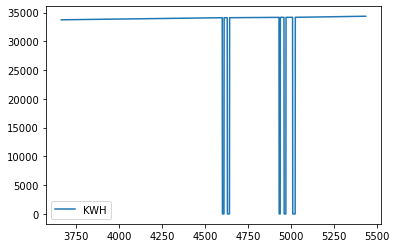

In [29]:
day168[['KWH']].plot()

In [30]:
day168.index=day168.hour

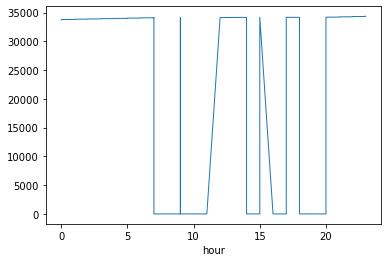

In [31]:
day168['KWH'].plot(linewidth=1)

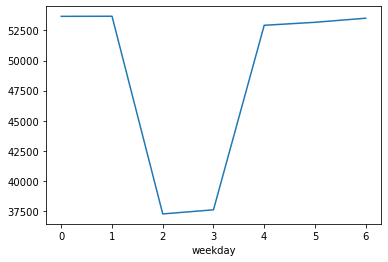

In [32]:
df.groupby('weekday').max()['KWH'].plot()

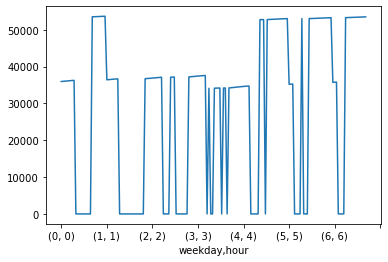

In [33]:
plt=df.groupby(['weekday','hour']).max()['KWH'].plot()

In [56]:
df.groupby(['weekday','hour'],as_index=True).ngroups

168

In [35]:
df.columns

Index(['Company Id', 'DateTime', 'ON/OFF', 'Level of Fuel', 'PF', 'KiloWatt',
       'KWH', 'ErrorCode', 'day', 'month', 'year', 'hour', 'weekday',
       'switch'],
      dtype='object')

In [36]:
df[((df.hour==0) | (df.hour==23)) & (df.switch==1)]

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode,day,month,year,hour,weekday,switch
3665,25750275,2018-08-16 00:00:26,1,78.368,0.962,48.7,33756.000000,0,16,8,2018,0,3,1
3666,25750275,2018-08-16 00:00:55,1,78.368,0.962,48.7,33756.398438,0,16,8,2018,0,3,1
3667,25750275,2018-08-16 00:01:25,1,82.160,0.962,48.8,33756.800781,0,16,8,2018,0,3,1
3668,25750275,2018-08-16 00:01:56,1,79.712,0.962,48.8,33757.199219,0,16,8,2018,0,3,1
3669,25750275,2018-08-16 00:02:25,1,78.704,0.962,48.8,33757.699219,0,16,8,2018,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19868,25750275,2018-10-16 00:16:52,1,77.936,0.909,26.7,53681.500000,0,16,10,2018,0,1,1
19869,25750275,2018-10-16 00:17:23,1,80.720,0.909,26.7,53681.699219,0,16,10,2018,0,1,1
19870,25750275,2018-10-16 00:17:53,1,81.936,0.912,26.0,53681.898438,0,16,10,2018,0,1,1
19871,25750275,2018-10-16 00:18:23,1,79.824,0.928,10.6,53682.101562,0,16,10,2018,0,1,1


In [37]:
df.hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

## Calculating fuel consumption

### Here we are calculating fuel consumption on hourly basis for one of the instance

In [38]:
df[(df['Company Id']==25927159) &(df.day==20) & (df.month==8) & df.ErrorCode==0].sort_values('hour')

,Company Id,DateTime,ON/OFF,Level of Fuel,PF,KiloWatt,KWH,ErrorCode,day,month,year,hour,weekday,switch
3665,25750275,2018-08-16 00:00:26,1,78.368,0.962,48.7,33756.000000,0,16,8,2018,0,3,1
13480,25750275,2018-08-23 00:01:47,1,95.216,0.959,47.2,37254.398438,0,23,8,2018,0,3,1
13481,25750275,2018-08-23 00:02:17,1,95.664,0.959,47.2,37254.800781,0,23,8,2018,0,3,1
13482,25750275,2018-08-23 00:02:48,1,94.432,0.959,47.2,37255.199219,0,23,8,2018,0,3,1
13483,25750275,2018-08-23 00:03:17,1,95.440,0.959,47.2,37255.601562,0,23,8,2018,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18869,25750275,2018-10-14 23:03:11,1,79.040,0.927,24.8,53500.000000,0,14,10,2018,23,6,1
18868,25750275,2018-10-14 23:02:40,1,79.040,0.927,24.9,53499.800781,0,14,10,2018,23,6,1
18867,25750275,2018-10-14 23:02:11,1,80.272,0.927,24.9,53499.601562,0,14,10,2018,23,6,1
18865,25750275,2018-10-14 23:01:10,1,79.040,0.927,25.0,53499.101562,0,14,10,2018,23,6,1


In [39]:
inital_value=day168['Level of Fuel'].values[0]
inital_value

78.368

In [40]:
(day168['Level of Fuel'].diff().fillna(0)).apply(lambda x:min(x,0))

hour
0     0.000
0     0.000
0     0.000
0    -2.448
0    -1.008
      ...  
23    0.000
23   -1.008
23    0.000
23    0.000
23    0.000
Name: Level of Fuel, Length: 1771, dtype: float64

In [41]:
data=pd.read_excel("data_set.xlsx")

In [42]:
df=data[data.ErrorCode==0].copy()

In [43]:
df['day'] = df.DateTime.dt.day
df['month'] = df.DateTime.dt.month
df['year'] = df.DateTime.dt.year
df['hour']=df.DateTime.dt.hour
df['weekday']=df.DateTime.dt.weekday

In [44]:
df['Company Id'].unique()

array([25502921, 25750275, 25921010, 25921355, 25927159], dtype=int64)

In [45]:
df_grp=df.groupby(['Company Id','day','month','weekday'],as_index=True)

In [46]:
all_initial_values=df_grp['Level of Fuel'].apply(lambda x: x.values[0])
all_initial_values

Company Id  day  month  weekday
25502921    1    10     0          50.2250
            2    10     1          56.3325
            3    10     2          51.2050
            4    10     3          91.1750
            5    9      2          66.3250
                                    ...   
25927159    29   8      2           0.0000
                 9      5           0.0000
            30   8      3           0.0000
                 9      6           0.0000
            31   8      4           0.0000
Name: Level of Fuel, Length: 185, dtype: float64

In [47]:
energy_diffs=df_grp['KWH'].apply(lambda x :(sum(x.diff().fillna(0))))
energy_diffs

Company Id  day  month  weekday
25502921    1    10     0             0.000000
            2    10     1             0.000000
            3    10     2             0.000000
            4    10     3             0.000000
            5    9      2             0.000000
                                      ...     
25927159    29   8      2          1133.593750
                 9      5             0.000000
            30   8      3          1078.203125
                 9      6             0.000000
            31   8      4           867.296875
Name: KWH, Length: 185, dtype: float64

### Fuel consumption for every data sample

In [73]:
fuel_consumption_per_sample=df_grp['Level of Fuel'].apply(lambda x :abs(x.diff().fillna(0).apply(lambda x:min(x,0))))
fuel_consumption_per_sample

0         0.000
1        19.443
2         1.942
3         1.103
4         1.119
          ...  
72785     0.000
72786     0.000
72788     0.000
72789     0.000
72790     0.000
Name: Level of Fuel, Length: 63505, dtype: float64

## Fuel consumption on hourly basis

In [74]:
fuel_consumption_hourly=df.groupby(['Company Id','day','month','weekday','hour'],as_index=True)['Level of Fuel'].apply(lambda x :abs(sum(x.diff().fillna(0).apply(lambda x:min(x,0)))))

In [75]:
fuel_consumption_hourly

Company Id  day  month  weekday  hour
25502921    1    10     0        9       3.3250
                                 10      1.1025
                                 11      2.2225
                                 12      1.1025
                                 13      0.0000
                                          ...  
25927159    31   8      4        19      0.0000
                                 20      0.0000
                                 21      0.0000
                                 22      0.0000
                                 23      0.0000
Name: Level of Fuel, Length: 3998, dtype: float64

## Fuel consumption on daily basis

In [79]:
fuel_consumption_daily=df_grp['Level of Fuel'].apply(lambda x :abs(sum(x.diff().fillna(0).apply(lambda x:min(x,0)))))
# fuel_consumption[fuel_consumption==max(fuel_consumption)]


In [81]:
fuel_consumption_daily

Company Id  day  month  weekday
25502921    1    10     0            49.8050
            2    10     1            14.3150
            3    10     2            64.6625
            4    10     3            24.5530
            5    9      2             6.9300
                                     ...    
25927159    29   8      2             0.0000
                 9      5             0.0000
            30   8      3             0.0000
                 9      6          3562.8750
            31   8      4             0.0000
Name: Level of Fuel, Length: 185, dtype: float64

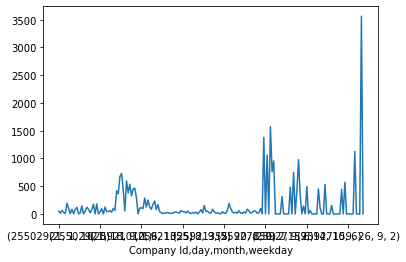

In [82]:
fuel_consumption_daily.plot()